<h1><center>TDA  with Python using the Gudhi Library </center></h1>

<h1><center> Incoding sublevels of functions with cubical complexes</center></h1> 



Author  : B. Michel

In [1]:
import numpy as np
#import pandas as pd
import pickle as pickle
import gudhi as gd  
from pylab import *
#import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
#from IPython.display import Image
#from sklearn.neighbors.kde import KernelDensity
%matplotlib inline

# Dataset 3: Crater dataset

We use the [crater dataset](http://bertrand.michel.perso.math.cnrs.fr/Enseignements/TDA/crater_tuto) to illustrate how to compute the cubical complex filtration.

In [29]:
f = open("crater_tuto","rb")
crater = pickle.load(f)
f.close()

The point cloud is composed of a center annulus and four clusters:

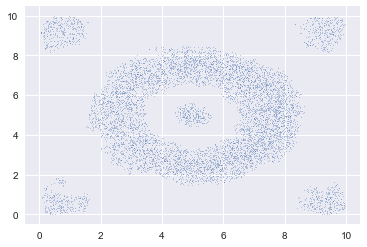

In [30]:
plt.scatter(crater[:,0],crater[:,1],s=0.1)

We can also visualize the density of the distribution (with a standard 2d-kernel estimator):

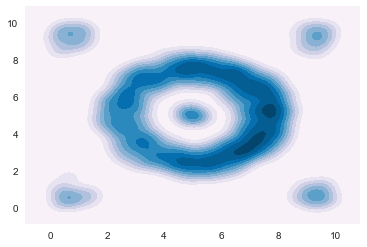

In [31]:
sns.kdeplot(crater, shade = True, cmap = "PuBu",bw=.3)

### Cubical filtration
[Documentation](http://gudhi.gforge.inria.fr/python/latest/cubical_complex_user.html)

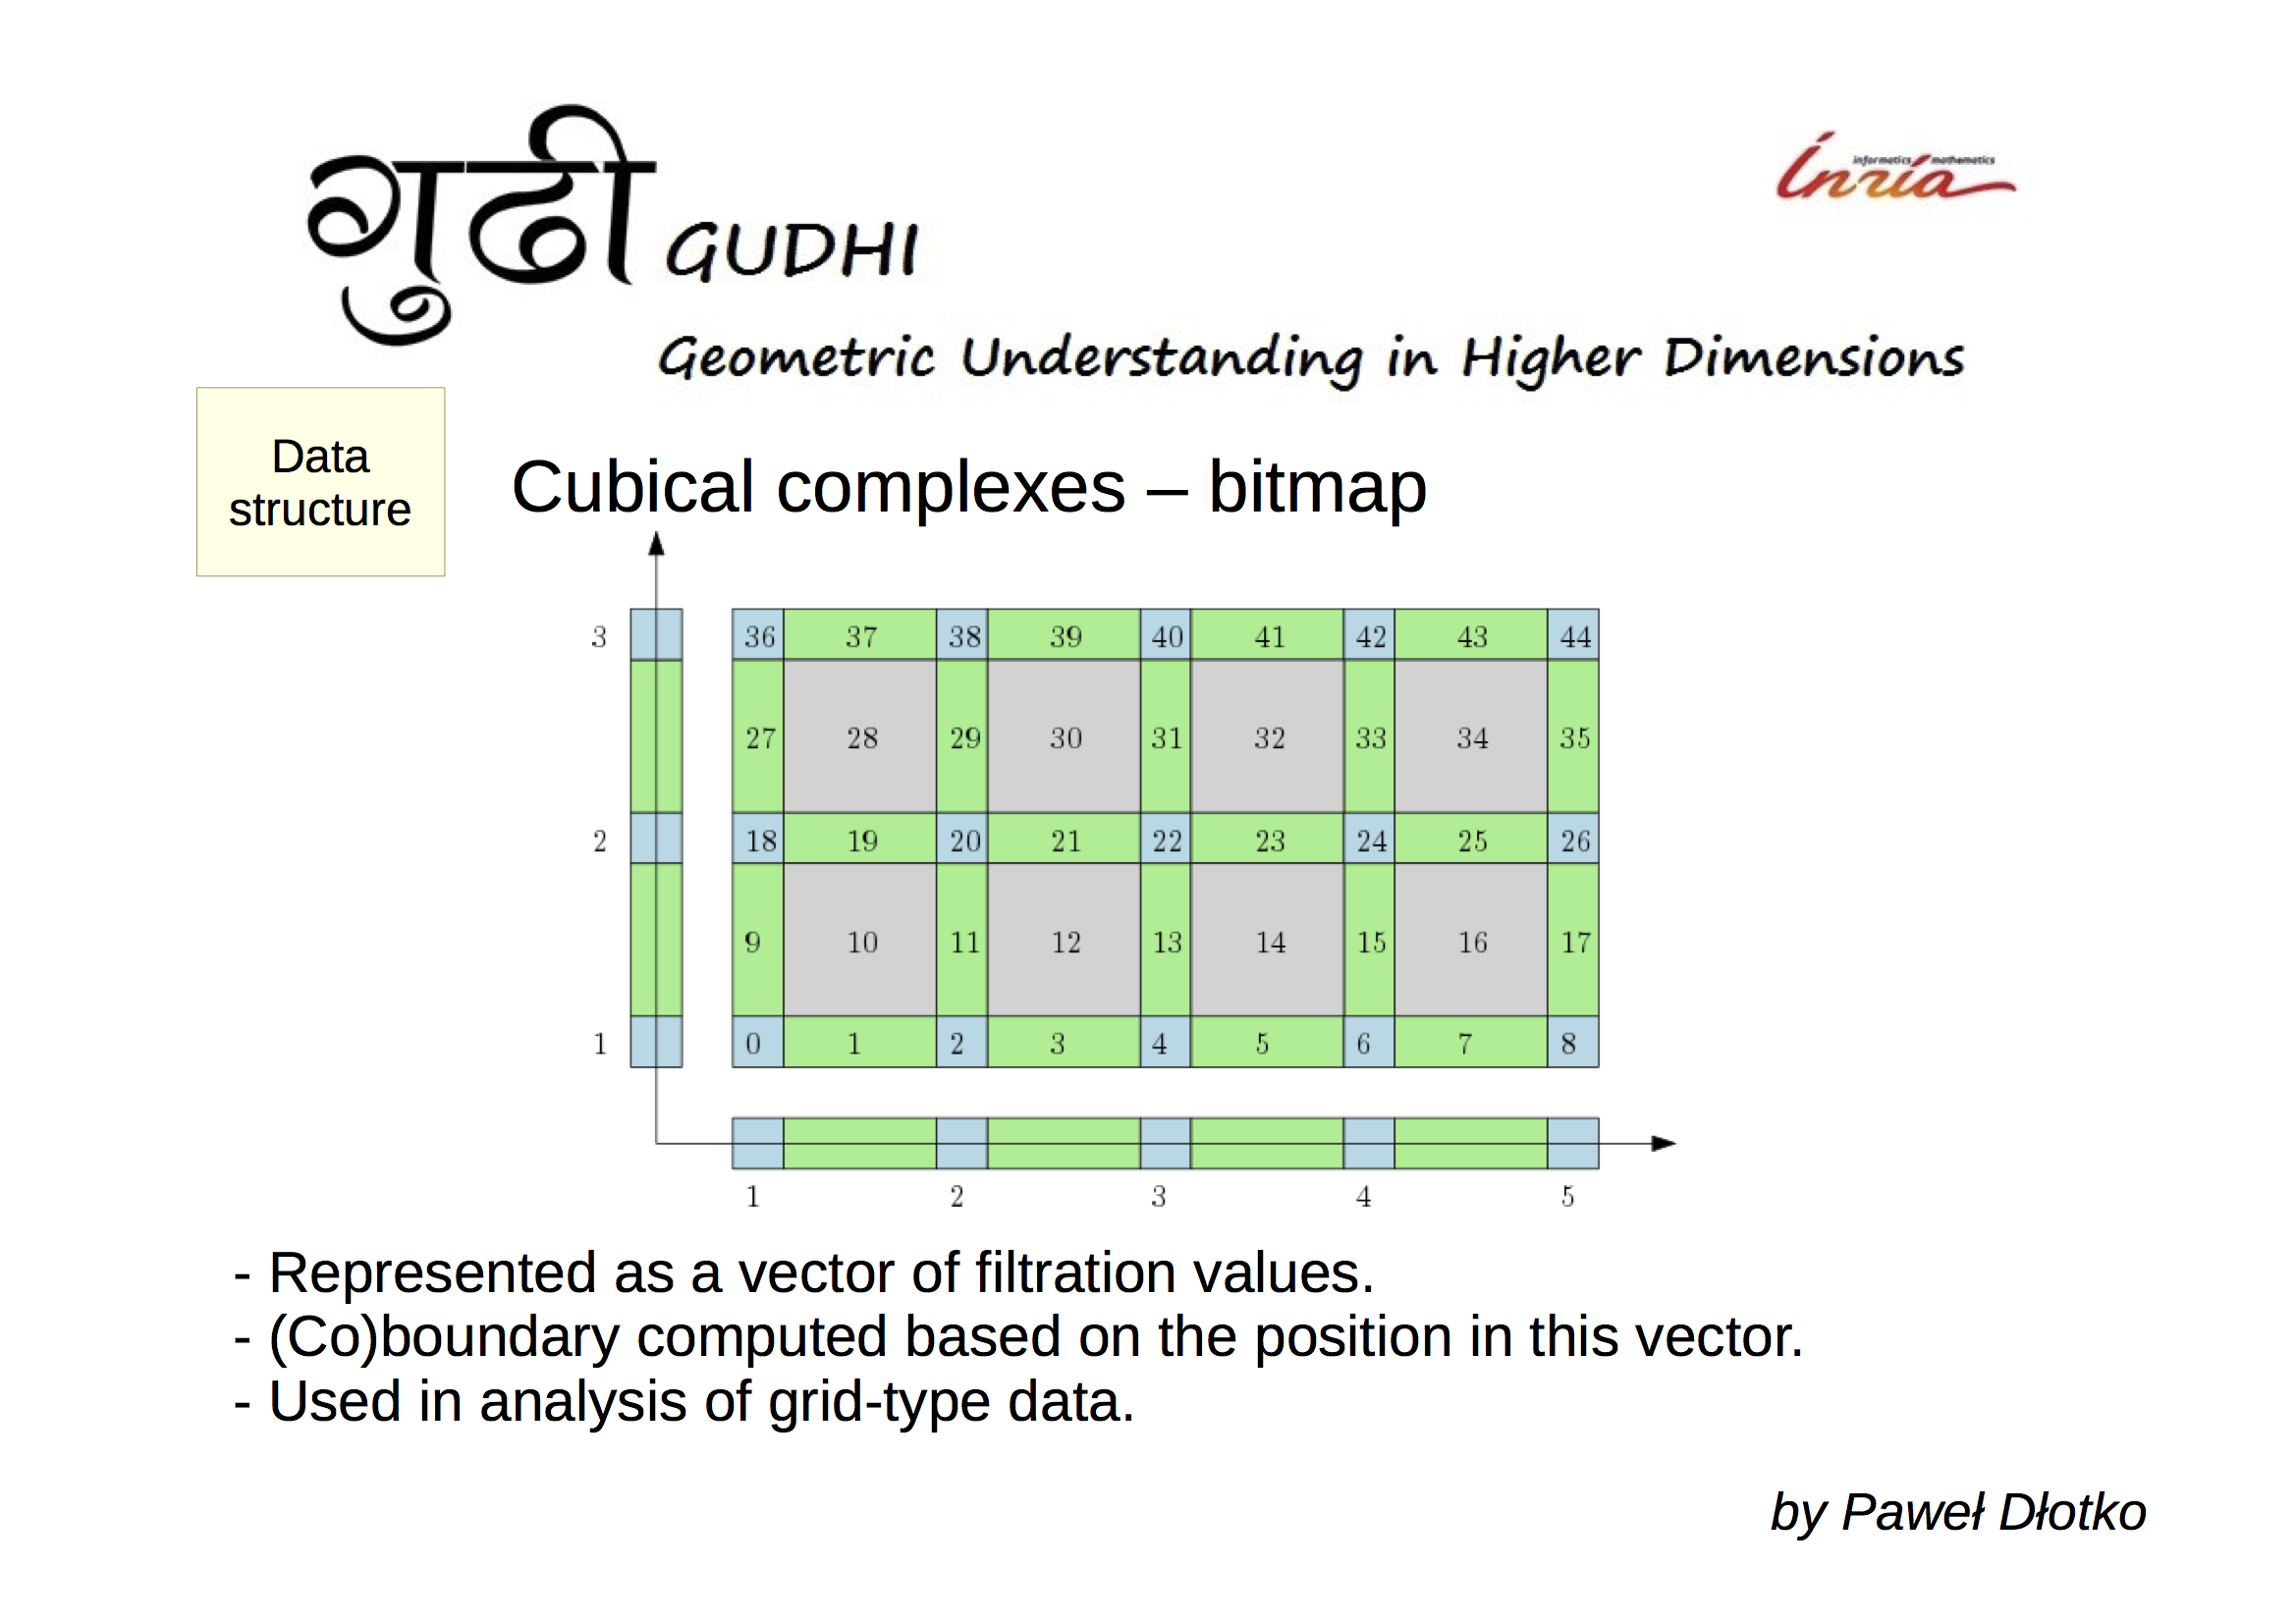

In [32]:
Image("SlidesGudhi/Cubical.png")

We create a grid on [0,10] x [0,10]

In [33]:
xval = np.arange(0,10,0.05)
yval = np.arange(0,10,0.05)
nx = len(xval)
ny = len(yval)

and we compute a standard kernel density estimator on this grid:

In [34]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.3).fit(crater)
positions = np.array([[u,v] for u in xval for v in yval ])
scores =  -exp(kde.score_samples(X= positions))

In [35]:
print(max(scores))
print(min(scores))

-3.01565312194e-12
-0.0381888309901


Now we can compute the cubical Complex filtration:

In [36]:
cc_density_crater= gd.CubicalComplex(dimensions= [nx ,ny],
                                    top_dimensional_cells = scores)

Note that the filtration is not stored in simplex tree in this case. 

### Persistence

To compute persistent homology, we directly use the <code>persistence()</code> method for the CubicalComplex object:

In [37]:
pers_density_crater = cc_density_crater.persistence()

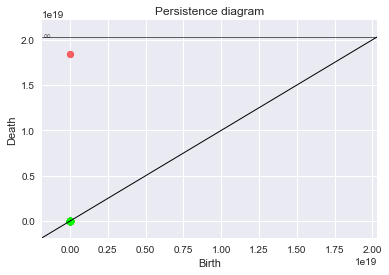

In [38]:
gd.plot_persistence_diagram(pers_density_crater)

It seems that the longest interval is not set at infinity:

In [39]:
pers_density_crater

[(1, (-0.02543885945226923, -0.0013721904033742861)),
 (1, (-0.002392925139894132, -0.0021101751354126357)),
 (1, (-0.002128770616911091, -0.0019334186106016945)),
 (1, (-0.002099504748084491, -0.0019483237232952905)),
 (1, (-0.0023357921272717593, -0.0022637102259464403)),
 (1, (-0.0018888743567167935, -0.0018625150849327396)),
 (1, (-0.0020890327923796382, -0.0020639793664016283)),
 (1, (-0.0020795334988030273, -0.00205464518963611)),
 (1, (-0.0019722405046820515, -0.001949411611527113)),
 (1, (-0.002053029273686075, -0.0020328307968777077)),
 (1, (-0.0031257162866984638, -0.0031094840042018117)),
 (1, (-0.002309243401949135, -0.00229439815691871)),
 (1, (-0.0021346791048090746, -0.002119938386275072)),
 (1, (-0.002085046465161946, -0.0020712426386026808)),
 (1, (-0.0030896714333155635, -0.0030767394803270444)),
 (1, (-0.002291418778587971, -0.002280029187755709)),
 (1, (-0.003075056467239267, -0.0030638815623353806)),
 (1, (-0.001983780982330259, -0.0019741533481695724)),
 (1, (-0.0

<p style="border:2px; border-style:solid; padding: 0.5em;border-color:red"> 
<b> Exercice. </b> Fix Pawel's code ;).
 </p>

In [40]:
pers_density_crater_inf = []
for l in pers_density_crater:
    if l[1][1] > 1000:
        pers_density_crater_inf.append((l[0],(l[1][0],inf)))
    else:
        pers_density_crater_inf.append(l)

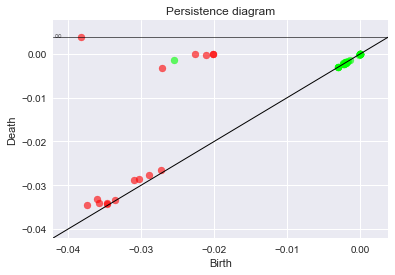

In [41]:
gd.plot_persistence_diagram(pers_density_crater_inf)